# Lab 31 January: The FFT and aliasing #

## Goals ##

After completing this lab you should be able to:

* compute and visualise the magnitude spectrum for any audio or other one-dimensional signal
* read in real-world audio files and manipulate them in Python
* reason about aliasing in the frequency domain



## Review ##

Before you do this lab, please make sure you've completed <a href="https://learn.gold.ac.uk/mod/resource/view.php?id=407662">Lab 12</a>. In that lab, you used code like the following to compute and plot the FFT:

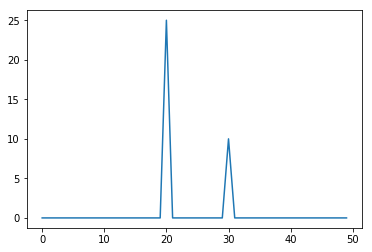

In [1]:
t = np.arange(0, 1, 1/100) #Use 100Hz sample rate
s = 0.5 * sin(2*pi*20*t) + 0.2 * sin(2*pi*30*t) #A 20Hz sine wave and a 30Hz sine wave
spectrum = fft.fft(s);
magspectrum = abs(spectrum)
plot(magspectrum[0:50]) #Plot the first 50 of 100 bins (we covered this in last week's lecture)

#Now you will see a peek at 20Hz and a shorter peek at 30Hz:

## Part 1: Digging deeper into FFT ##

You got lucky in Lab 12: Because we were analyzing a signal for exactly 1 second, the n-th element (or "bin") of the FFT corresponded to a frequency component of $n$ Hz. This won't always be the case, though! 

In IPython, you can use the `fft.fftfreq()` function to compute the frequencies associated with each bin in your spectrum array. This function returns array of frequencies, where the $n$-th element tells you the frequency of the $n$-th bin in your spectrum.

The first argument is the length of the FFT, and the second argument is the time in-between samples (i.e., 1/sample_rate):

In [2]:
fft.fftfreq(1024, 1/44100) #gives us frequencies for a 1024-bin FFT at 44100Hz sample rate

array([   0.        ,   43.06640625,   86.1328125 , ..., -129.19921875,
        -86.1328125 ,  -43.06640625])

We can use array index notation to find the frequency corresponding to, for example, the 256th bin:

In [3]:
fft.fftfreq(1024, 1/44100)[256]

11025.0

Before moving on to Part 2, test our your knowledge by doing the following:

a. Create a signal that is the sum of three sines, at 200, 300, and 600 Hz. Choose a different amplitude for each sine, being careful that the amplitudes sum to something less than 1. This signal should be sampled at 44100 Hz, for a total duration of 1 second.

b. Use the `play` function to play your signal. Verify it sounds as you expect (either a single bright tone, or a few simultaneous tones, depending on how you set the amplitudes.)

c. Compute the magnitude spectrum for __the first 1024 samples__ of your signal. Plot the spectrum, using bins 0 to 512 (i.e. from 0 to the Nyquist rate). Verify that it looks how you expect. 



d. "Zoom in" on your spectrum by plotting even fewer bins, for example bins 0 to 100, so that you can clearly see your three peaks.

e. Finally, make the plot really nice by plotting __frequency in Hz__, not bin index, on the x-axis.  For example, if you make a variable called `freqs` to store your 1024-length frequency array, and you store your magnitude spectrum in the variable `magspec`, you can plot the first 100 samples using the code below. (Careful: you'll get an error if the two arrays you pass to `plot` have different lengths!)

## Part 2: Applying to a real-world sound ##

a. Record a short sound (1-2 seconds, maximum) in Audacity, or use Audacity to select a 1-2 second snippet of a piece of music or other recording you already have. Save it as a .wav file with a 44100Hz sample rate (should be the default rate).

b. Load the .wav file into a new array variable called `mySound` using the following code, obviously replacing the file path with the correct path on your system:


In [5]:
mySound = wavReadMono("/Users/todd/.pyenv/versions/2.7.8/lib/python2.7/test/audiodata/pluck-pcm16.wav")

c. Verify your sound has loaded correctly by playing it and/or plotting the waveform:

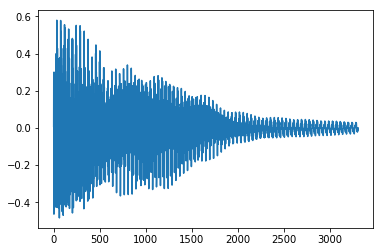

In [6]:
play(mySound)
plot(mySound)

d. Compute and plot the magnitude spectrum of your sound, using the same procedure as in Part 1. Hint: you can use the `size()` function to determine the size (i.e., number of samples) of your sound array.

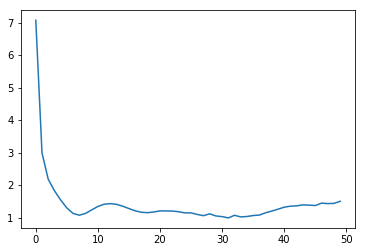

In [8]:
spectrum = fft.fft(mySound);
magspectrum = abs(spectrum)
plot(magspectrum[0:50]) 

Try this out for different sounds. Or, try it for different locations in your sound. For example, do the first 1024 samples of your sound have the same spectrum as the last 1024 samples?

Optionally, if you're happy with this and want to keep exploring, try using the `max` and `argmax` functions to pick out the peaks in the FFT spectrum. Don't forget you can type `?argmax` to read about the function syntax and usage.

## Part 3: Exploring aliasing ##

Generate the following signals:
* s1: An 1800Hz sine tone, sampled at 44100Hz
* s2: An 1800Hz sine tone, sampled at 4000Hz
* s3: An 1800Hz sine tone, sampled at 3000Hz


Which of these signals will alias? Which frequencies will you actually hear, for each signal? Write your answer below.



(Double-click on this cell and type your answer.)


Now play these signals, using the following syntax to play a signal with a custom sample rate (other than 44100):

In [ ]:
play(s3, rate=1000) #specify rate if it's not 44100 

Comment on what you hear:

(Double-click on this cell and type your answer.)

Now record a real-world sound (e.g., using Audacity), or find a .wav or .aiff file (not an MP3) of some music. (The sample rate for this file should be 44100Hz.) Load it into an array using the function `wavReadMono`. Play the sound to verify it has loaded correctly.

In [ ]:
?wavReadMono #use this function

Now change the sample rate from 44100Hz to 22050Hz by storing every other sample of the sound in a new array called `downsample1`.  Then play this new array, using the syntax `play(downsample1, rate=22050`:

Do you hear a difference? Comment below. (Note that if you hear the overall pitch change, you've probably forgotten to specify the rate explicitly in the `play` function)

(Type your answer here)

Continue to lower the sample rate. Try keeping only 1 of every 3 samples, or 1 of every 4 samples, etc. Show your work below. At what point does the sound noticeably change?

Finally, please write some code below to:

(1) generate a signal by adding 3 sine waves of different frequencies.

(2) plot the FFT of this signal, verifying that you see a peak at each frequency

(3) add a 4th sine wave to this signal, but at a frequency above the Nyquist rate

(4) plot the FFT of this new signal, noting where you see the aliased frequency.